 # Skin Diasese detection test

In [84]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Num GPUs Available:  0


In [85]:
tf.__version__

'2.10.0'

## Processing the training set

In [86]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.8,1.2],
    fill_mode='nearest'
)
training_set = train_datagen.flow_from_directory(
    'C:/Users/User/Downloads/6_skin_diseases/kaggle/train',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
)

Found 30909 images belonging to 6 classes.


## Preprocessing the test set

In [87]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    'C:/Users/User/Downloads/6_skin_diseases/kaggle/test',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
)

Found 3928 images belonging to 6 classes.


## Building the CNN

In [88]:
cnn = tf.keras.models.Sequential()

In [89]:
cnn.add(tf.keras.layers.Conv2D(
    filters=32,
    kernel_size=3,
    activation='relu',
    input_shape=(128, 128, 3)
))

In [90]:
cnn.add(tf.keras.layers.MaxPool2D(
    pool_size=2,
    strides=2
))

In [91]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [92]:
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [93]:
cnn.add(tf.keras.layers.Flatten())

In [94]:
cnn.add(tf.keras.layers.Dense(units=64, activation='relu'))

In [95]:
cnn.add(tf.keras.layers.Dense(units=6, activation='softmax'))

In [96]:
cnn.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [97]:
cnn.fit(x = training_set, validation_data = test_set, epochs=35, verbose=1)

Epoch 1/35
966/966 [==============================] - 481s 497ms/step - loss: 1.2786 - accuracy: 0.4745 - val_loss: 1.1823 - val_accuracy: 0.4880
Epoch 2/35
966/966 [==============================] - 478s 495ms/step - loss: 1.1770 - accuracy: 0.5146 - val_loss: 1.1270 - val_accuracy: 0.5354
Epoch 3/35
966/966 [==============================] - 467s 483ms/step - loss: 1.1291 - accuracy: 0.5407 - val_loss: 1.0712 - val_accuracy: 0.5614
Epoch 4/35
966/966 [==============================] - 456s 472ms/step - loss: 1.0961 - accuracy: 0.5519 - val_loss: 1.0430 - val_accuracy: 0.5759
Epoch 5/35
966/966 [==============================] - 476s 492ms/step - loss: 1.0596 - accuracy: 0.5723 - val_loss: 1.0401 - val_accuracy: 0.5690
Epoch 6/35
966/966 [==============================] - 480s 496ms/step - loss: 1.0277 - accuracy: 0.5903 - val_loss: 0.9617 - val_accuracy: 0.6186
Epoch 7/35
966/966 [==============================] - 442s 457ms/step - loss: 1.0005 - accuracy: 0.6005 - val_loss: 0.9699 -

KeyboardInterrupt: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay


In [ ]:
# Reset the generator to ensure consistency
test_set.reset()

# Get true labels
true_labels = test_set.classes

# Predict all test images
predictions = cnn.predict(test_set, verbose=1)
predicted_labels = np.argmax(predictions, axis=1)


123/123 [==============================] - 48s 387ms/step


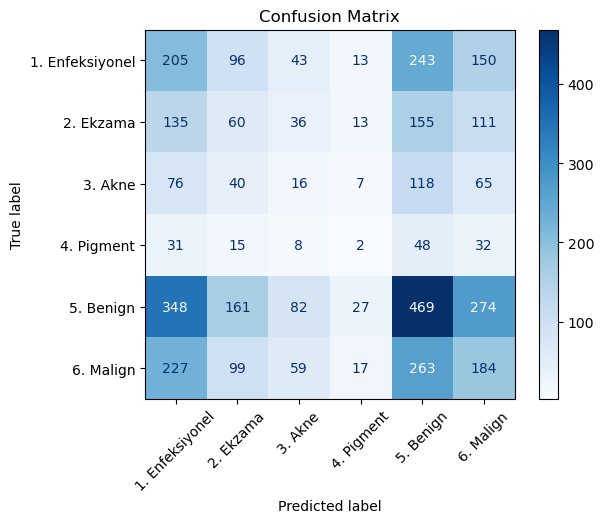

In [ ]:
# Get class names from generator
class_labels = list(test_set.class_indices.keys())

# Create confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()


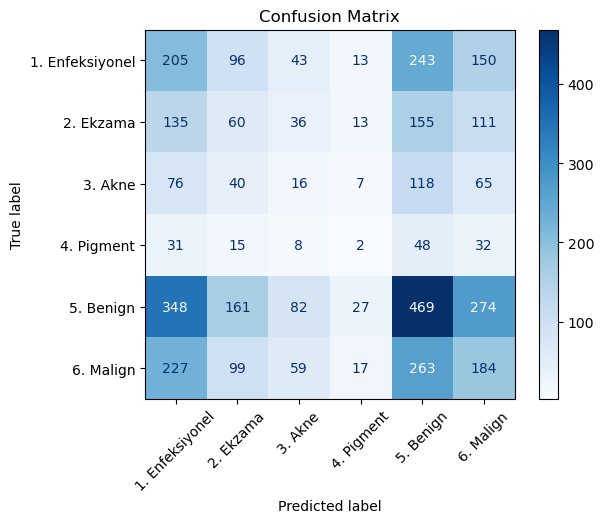

In [ ]:
# Get class names from generator
class_labels = list(test_set.class_indices.keys())

# Create confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()


In [ ]:
cnn.save('6_skin_disease_model_v3.h5')  # or .keras

In [ ]:
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array  # ✅ Modern import

# Load and preprocess the image
test_image = load_img('C:/Users/User/Downloads/6_skin_diseases/kaggle/single_test/ezm.jpg', target_size=(128, 128))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Predict using the CNN model
result = cnn.predict(test_image)

# Define class labels in the same order as training_set.class_indices
class_labels = [
    "Enfeksiyonel",
    "Ekzama",
    "Akne",
    "Pigment",
    "Benign",
    "Malign"
]

# Get the predicted class index
predicted_index = np.argmax(result[0])
prediction = class_labels[predicted_index]

print("Predicted class:", prediction)


1/1 [==============================] - 0s 43ms/step
Predicted class: Malign
